<a href="https://colab.research.google.com/github/TAUforPython/wavelets/blob/main/example%20DFT%20discrete%20Fourier%20transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import seaborn as sns

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Создание сигнала для анализа
def create_signal_example():
    """Создание примера сигнала из двух синусоид"""
    # Параметры
    sampling_rate = 1000  # частота дискретизации (Гц)
    duration = 2.0        # длительность сигнала (сек)
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

    # Создание сигнала: сумма двух синусоид
    frequency1 = 5   # 5 Гц
    frequency2 = 50  # 50 Гц
    signal = np.sin(2 * np.pi * frequency1 * t) + 0.5 * np.sin(2 * np.pi * frequency2 * t)

    return t, signal, sampling_rate

# Вычисление DFT
def compute_dft(signal):
    """Вычисление дискретного преобразования Фурье"""
    dft_result = fft(signal)
    return dft_result


# Fourier transform example

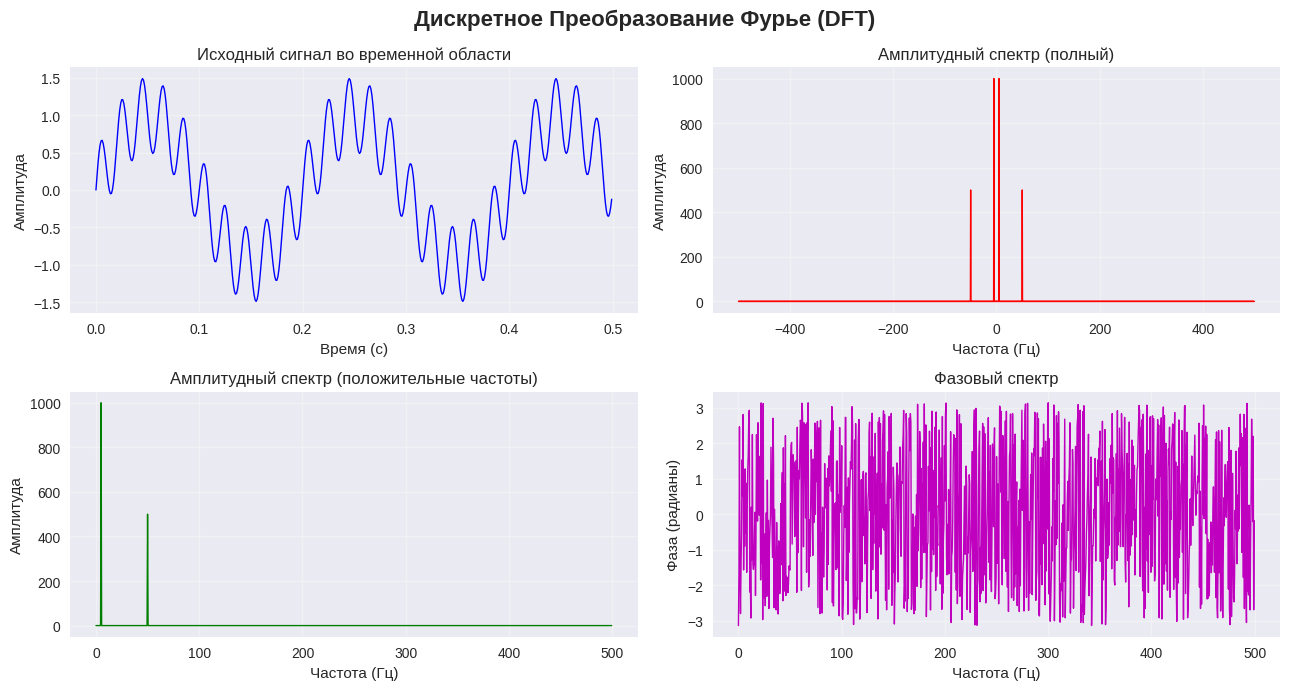

ИНФОРМАЦИЯ О СИГНАЛЕ:
Частота дискретизации: 1000 Гц
Длительность сигнала: 2.0 секунд
Количество отсчетов: 2000
Разрешение по частоте: 0.5 Гц


In [6]:

# Создание сигнала
t, signal, fs = create_signal_example()

# Вычисление DFT
dft_result = compute_dft(signal)
frequencies = fftfreq(len(signal), 1/fs)

# Создание графиков
fig, axes = plt.subplots(2, 2, figsize=(13, 7))
fig.suptitle('Дискретное Преобразование Фурье (DFT)', fontsize=16, fontweight='bold')

# 1. Исходный сигнал во временной области
axes[0, 0].plot(t[:500], signal[:500], 'b-', linewidth=1)
axes[0, 0].set_xlabel('Время (с)')
axes[0, 0].set_ylabel('Амплитуда')
axes[0, 0].set_title('Исходный сигнал во временной области')
axes[0, 0].grid(True, alpha=0.3)

# 2. Амплитудный спектр (полный)
magnitude_spectrum = np.abs(dft_result)
axes[0, 1].plot(frequencies, magnitude_spectrum, 'r-', linewidth=1)
axes[0, 1].set_xlabel('Частота (Гц)')
axes[0, 1].set_ylabel('Амплитуда')
axes[0, 1].set_title('Амплитудный спектр (полный)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Амплитудный спектр (только положительные частоты)
positive_freq_idx = frequencies >= 0
axes[1, 0].plot(frequencies[positive_freq_idx], magnitude_spectrum[positive_freq_idx], 'g-', linewidth=1)
axes[1, 0].set_xlabel('Частота (Гц)')
axes[1, 0].set_ylabel('Амплитуда')
axes[1, 0].set_title('Амплитудный спектр (положительные частоты)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Фазовый спектр
phase_spectrum = np.angle(dft_result)
axes[1, 1].plot(frequencies[positive_freq_idx], phase_spectrum[positive_freq_idx], 'm-', linewidth=1)
axes[1, 1].set_xlabel('Частота (Гц)')
axes[1, 1].set_ylabel('Фаза (радианы)')
axes[1, 1].set_title('Фазовый спектр')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Вывод информации о сигнале
print("ИНФОРМАЦИЯ О СИГНАЛЕ:")
print("=" * 50)
print(f"Частота дискретизации: {fs} Гц")
print(f"Длительность сигнала: {len(signal)/fs} секунд")
print(f"Количество отсчетов: {len(signal)}")
print(f"Разрешение по частоте: {fs/len(signal)} Гц")


ОСНОВНЫЕ ЧАСТОТЫ В СИГНАЛЕ:
Частота: 5.0 Гц
Частота: 50.0 Гц

ПРИНЦИП РАБОТЫ DFT:
Дискретное преобразование Фурье (DFT) преобразует сигнал:
• Из временной области → в частотную область
• Разлагает сложный сигнал на сумму синусоид
• Показывает, какие частоты присутствуют в сигнале
• Амплитуда пиков показывает силу каждой частоты


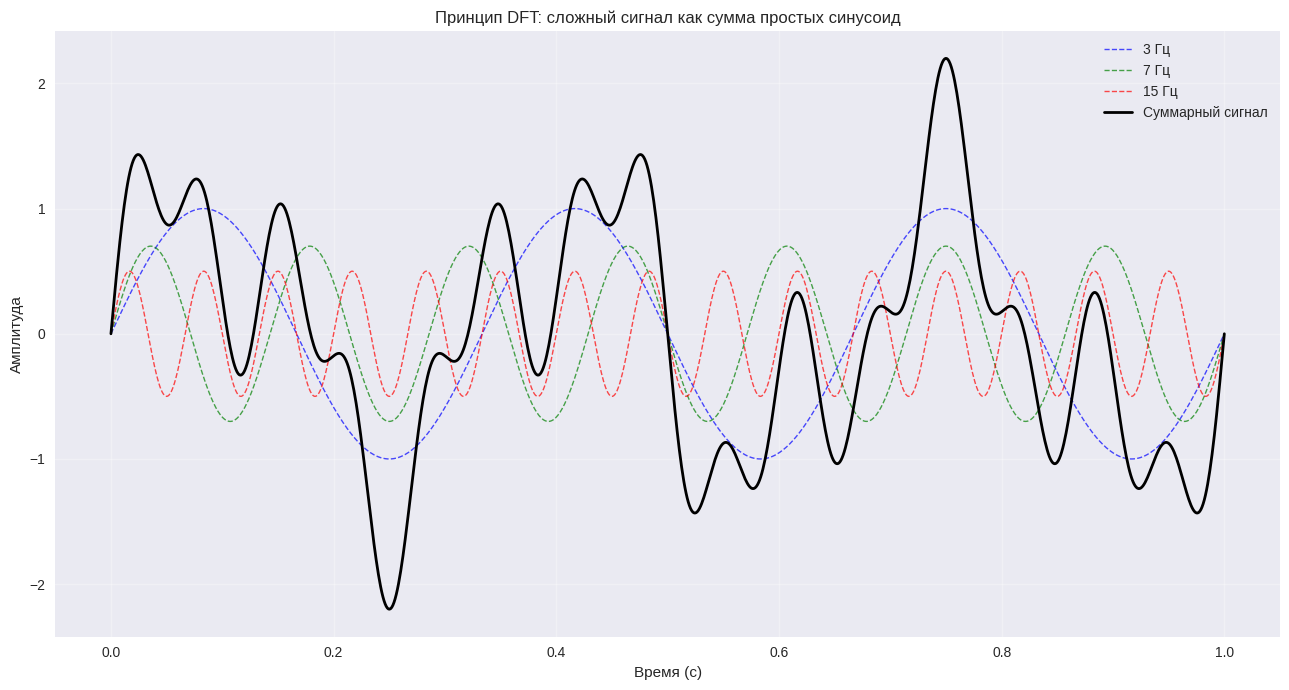

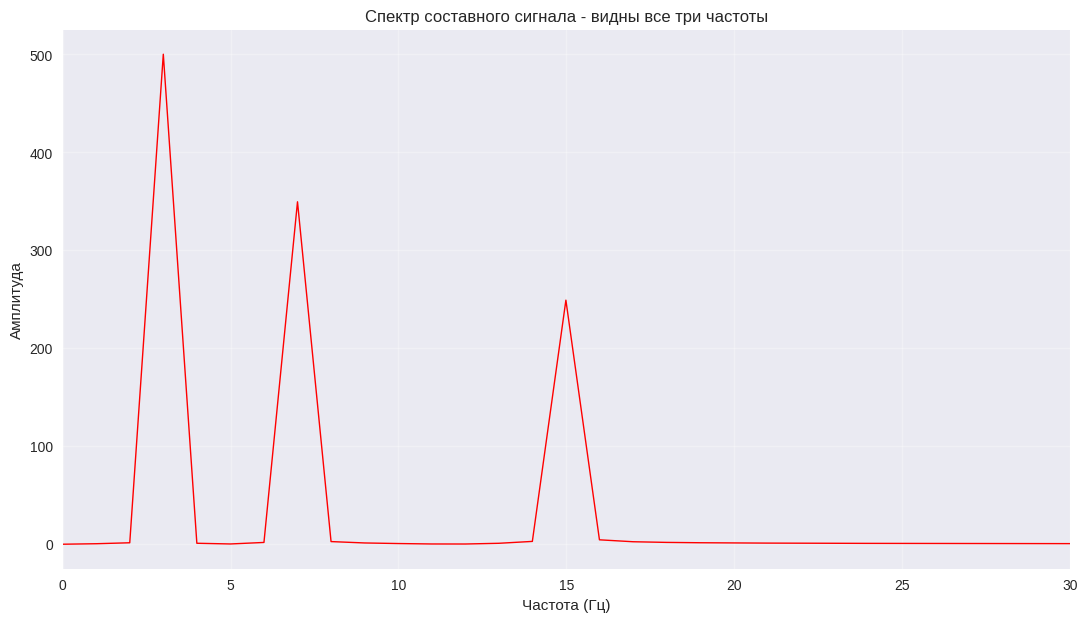

In [10]:

# Поиск пиков в спектре
positive_magnitude = magnitude_spectrum[positive_freq_idx]
peak_indices = np.where(positive_magnitude > np.max(positive_magnitude) * 0.1)[0]
dominant_frequencies = frequencies[positive_freq_idx][peak_indices]

print("\nОСНОВНЫЕ ЧАСТОТЫ В СИГНАЛЕ:")
print("=" * 50)
for freq in dominant_frequencies[:5]:  # Показываем первые 5 пиков
    if freq > 0:
        print(f"Частота: {freq:.1f} Гц")

# Демонстрация принципа DFT
print("\nПРИНЦИП РАБОТЫ DFT:")
print("=" * 50)
print("Дискретное преобразование Фурье (DFT) преобразует сигнал:")
print("• Из временной области → в частотную область")
print("• Разлагает сложный сигнал на сумму синусоид")
print("• Показывает, какие частоты присутствуют в сигнале")
print("• Амплитуда пиков показывает силу каждой частоты")

# Создание анимации принципа DFT (упрощенная визуализация)
fig, ax = plt.subplots(1, 1, figsize=(13, 7))

# Создание составного сигнала пошагово
time_steps = np.linspace(0, 1, 1000)
component1 = np.sin(2 * np.pi * 3 * time_steps)  # 3 Гц
component2 = 0.7 * np.sin(2 * np.pi * 7 * time_steps)  # 7 Гц
component3 = 0.5 * np.sin(2 * np.pi * 15 * time_steps)  # 15 Гц
composite_signal = component1 + component2 + component3

# График составляющих и результирующего сигнала
ax.plot(time_steps, component1, 'b--', alpha=0.7, label='3 Гц', linewidth=1)
ax.plot(time_steps, component2, 'g--', alpha=0.7, label='7 Гц', linewidth=1)
ax.plot(time_steps, component3, 'r--', alpha=0.7, label='15 Гц', linewidth=1)
ax.plot(time_steps, composite_signal, 'k-', label='Суммарный сигнал', linewidth=2)
ax.set_xlabel('Время (с)')
ax.set_ylabel('Амплитуда')
ax.set_title('Принцип DFT: сложный сигнал как сумма простых синусоид')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Спектр составного сигнала
composite_dft = fft(composite_signal)
composite_freq = fftfreq(len(composite_signal), time_steps[1] - time_steps[0])

fig, ax = plt.subplots(1, 1, figsize=(13, 7))
ax.plot(composite_freq[composite_freq >= 0],
        np.abs(composite_dft[composite_freq >= 0]), 'r-', linewidth=1)
ax.set_xlabel('Частота (Гц)')
ax.set_ylabel('Амплитуда')
ax.set_title('Спектр составного сигнала - видны все три частоты')
ax.grid(True, alpha=0.3)
plt.xlim(0, 30)
plt.show()

# Discrete Fourier Transform

Ключевые аспекты приближения:

Частота дискретизации - чем выше, тем точнее приближение
Эффект Гиббса - осцилляции при приближении разрывных функций
Теорема Котельникова - требование для точного восстановления
Принцип неопределенности - невозможно быть точно ограниченным и во времени, и по частоте


> Add blockquote
Запустите этот код , чтобы увидеть наглядные сравнения и понять, как DFT может приближать CTFT:
https://github.com/TAUforPython/wavelets/blob/main/DFT_and_CFT.ipynb


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.fft import fft, fftshift

# Функция для численного вычисления непрерывного преобразования Фурье
def cft(g, f):
    """Numerically evaluate the Fourier Transform of g for the given frequencies"""
    result = np.zeros(len(f), dtype=complex)
    # Loop over all frequencies and calculate integral value
    for i, ff in enumerate(f):
        # Evaluate the Fourier Integral for a single frequency ff,
        # assuming the function is time-limited to abs(t)<5
        result[i] = complex_quad(lambda t: g(t)*np.exp(-2j*np.pi*ff*t), -5, 5)
    return result

def complex_quad(g, a, b):
    """Return definite integral of complex-valued g from a to b,
    using Simpson's rule"""
    # 2501: Amount of used samples for the trapezoidal rule
    t = np.linspace(a, b, 2501)
    x = g(t)
    return integrate.simpson(y=x, x=t)  # Исправлено: simps -> simpson

# Определим функции
def rect(t):
    return (abs(t) < 0.5).astype(float)

def gaussian_rect_sum(t):
    return (rect(t) - rect(t-0.5)) * np.exp(-t*t)

СРАВНЕНИЕ НЕПРЕРЫВНОГО И ДИСКРЕТНОГО ПРЕОБРАЗОВАНИЙ ФУРЬЕ
1. ВЫСОКАЯ ЧАСТОТА ДИСКРЕТИЗАЦИИ (51 Гц) - хорошее приближение:


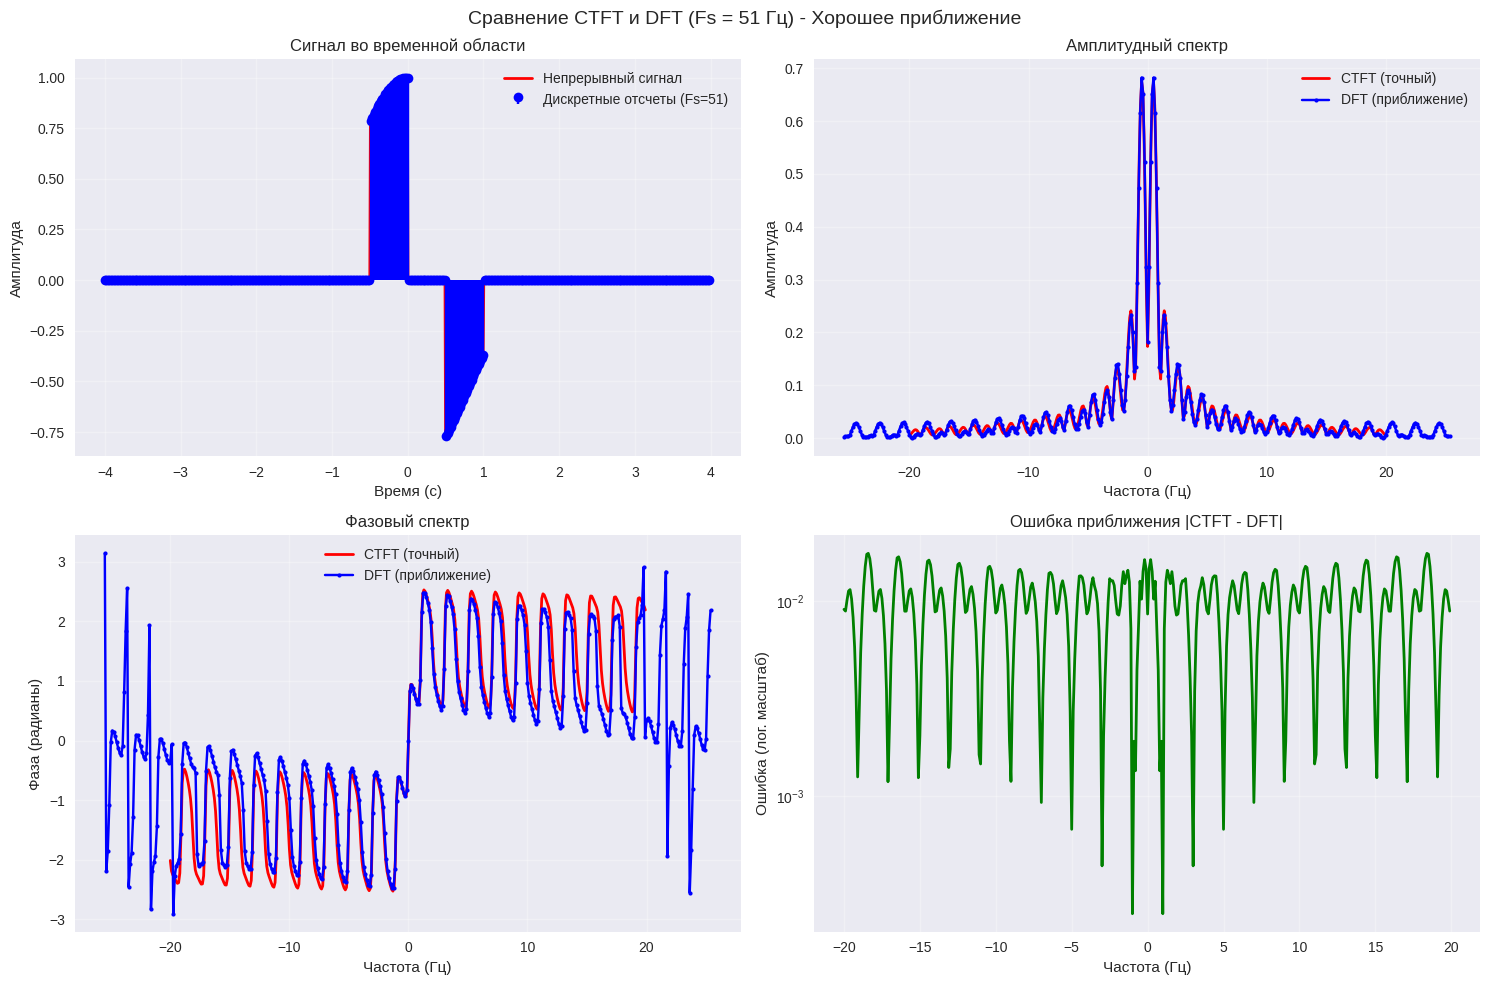


Частота дискретизации: 51 Гц
Количество отсчетов: 408
Максимальная ошибка приближения: 0.017562
Средняя ошибка приближения: 0.009423

2. НИЗКАЯ ЧАСТОТА ДИСКРЕТИЗАЦИИ (5 Гц) - плохое приближение:


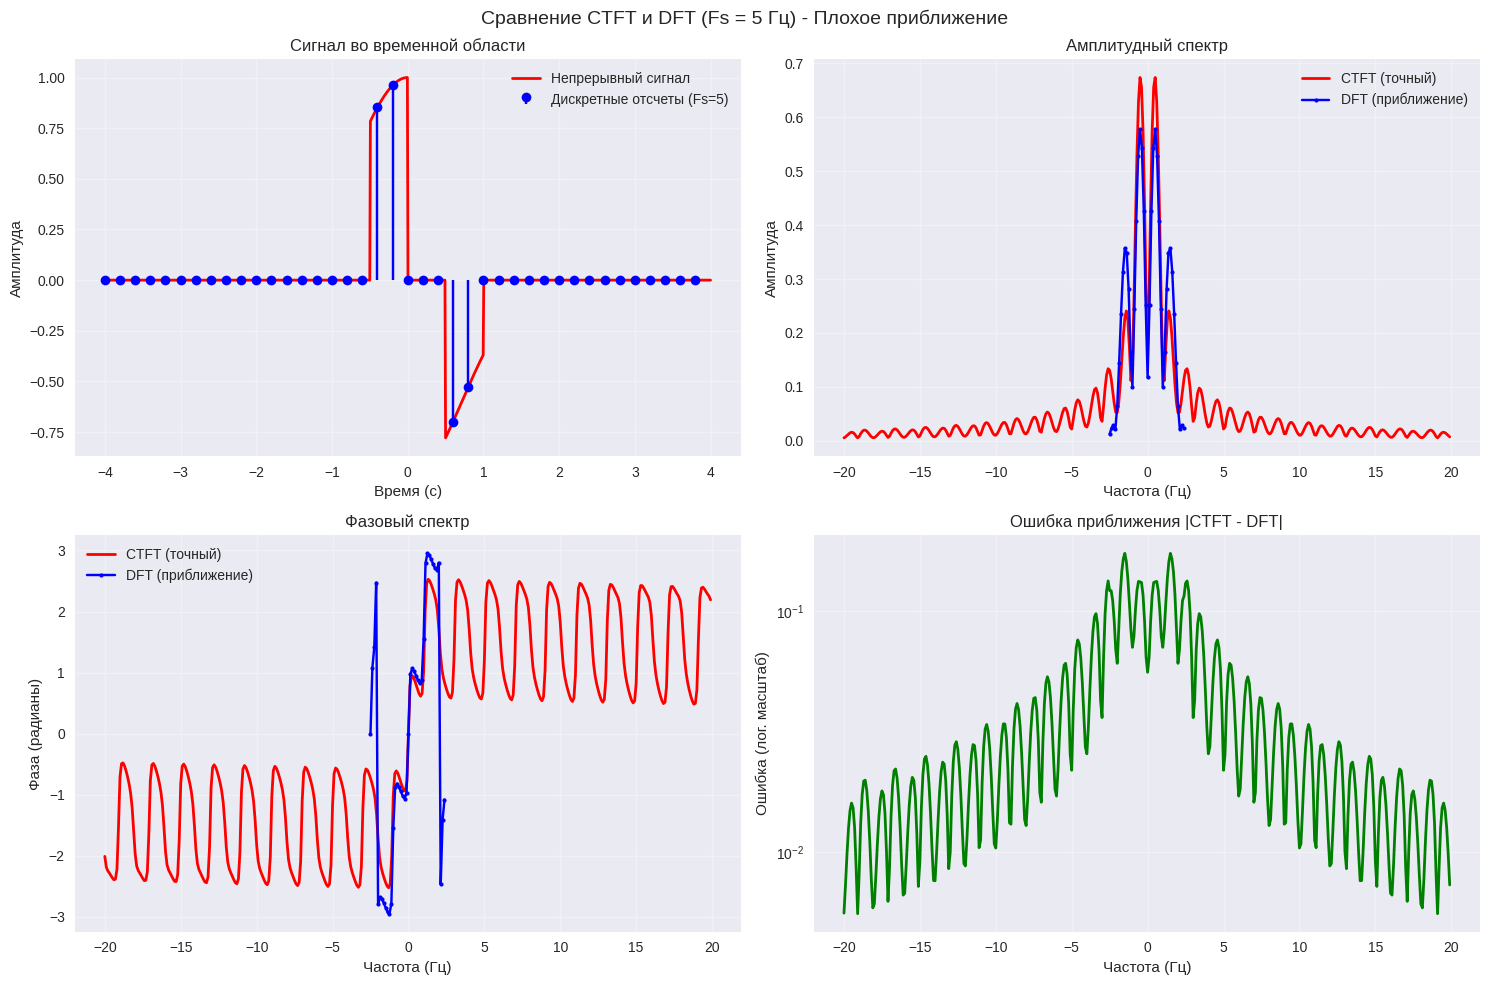


Частота дискретизации: 5 Гц
Количество отсчетов: 40
Максимальная ошибка приближения: 0.174164
Средняя ошибка приближения: 0.038081


In [16]:


# Параметры
t0 = 4  # Время ограничения
t_full = np.linspace(-t0, t0, 1000)

# Частоты для точного CTFT
f_full = np.arange(-20, 20, 0.1)

print("СРАВНЕНИЕ НЕПРЕРЫВНОГО И ДИСКРЕТНОГО ПРЕОБРАЗОВАНИЙ ФУРЬЕ")
print("=" * 60)

# Вычисляем точное CTFT
G_exact = cft(gaussian_rect_sum, f_full)

# Создаем функцию для сравнения
def compare_ctft_dft(Fs, title_suffix=""):
    """Сравнение CTFT и DFT для заданной частоты дискретизации"""

    # Создаем дискретные отсчеты сигнала
    t_samples = np.arange(-t0, t0, 1./Fs)
    samples = gaussian_rect_sum(t_samples)

    # Частоты для DFT (по теореме о сдвиге частоты)
    f_dft = np.linspace(-Fs/2, Fs/2, len(samples), endpoint=False)

    # Вычисляем DFT и преобразуем для приближения CTFT
    # G_approx = (1/Fs) * exp(j*2*pi*f*t0) * DFT{g[n]}
    G_dft_raw = fft(samples)
    G_approx = fftshift(G_dft_raw) * np.exp(-2j*np.pi * f_dft * t0) / Fs

    # Создаем графики
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Сравнение CTFT и DFT (Fs = {Fs} Гц){title_suffix}', fontsize=14)

    # 1. Исходный сигнал и его дискретные отсчеты
    axes[0,0].plot(t_full, gaussian_rect_sum(t_full), 'r-', linewidth=2, label='Непрерывный сигнал')
    axes[0,0].stem(t_samples, samples, linefmt='b-', markerfmt='bo', basefmt=' ', label=f'Дискретные отсчеты (Fs={Fs})')
    axes[0,0].set_xlabel('Время (с)')
    axes[0,0].set_ylabel('Амплитуда')
    axes[0,0].set_title('Сигнал во временной области')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

    # 2. Амплитудные спектры
    axes[0,1].plot(f_full, np.abs(G_exact), 'r-', linewidth=2, label='CTFT (точный)')
    axes[0,1].plot(f_dft, np.abs(G_approx), 'bo-', markersize=3, label='DFT (приближение)')
    axes[0,1].set_xlabel('Частота (Гц)')
    axes[0,1].set_ylabel('Амплитуда')
    axes[0,1].set_title('Амплитудный спектр')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

    # 3. Фазовые спектры
    axes[1,0].plot(f_full, np.angle(G_exact), 'r-', linewidth=2, label='CTFT (точный)')
    axes[1,0].plot(f_dft, np.angle(G_approx), 'bo-', markersize=3, label='DFT (приближение)')
    axes[1,0].set_xlabel('Частота (Гц)')
    axes[1,0].set_ylabel('Фаза (радианы)')
    axes[1,0].set_title('Фазовый спектр')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)

    # 4. Ошибка приближения
    # Интерполируем DFT результаты для сравнения с CTFT на тех же частотах
    error = np.abs(G_exact - np.interp(f_full, f_dft, G_approx, left=0, right=0, period=None))
    axes[1,1].semilogy(f_full, error, 'g-', linewidth=2)
    axes[1,1].set_xlabel('Частота (Гц)')
    axes[1,1].set_ylabel('Ошибка (лог. масштаб)')
    axes[1,1].set_title('Ошибка приближения |CTFT - DFT|')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Выводим информацию
    print(f"\nЧастота дискретизации: {Fs} Гц")
    print(f"Количество отсчетов: {len(samples)}")
    print(f"Максимальная ошибка приближения: {np.max(error):.6f}")
    print(f"Средняя ошибка приближения: {np.mean(error):.6f}")

# Демонстрация с высокой частотой дискретизации (хорошее приближение)
print("1. ВЫСОКАЯ ЧАСТОТА ДИСКРЕТИЗАЦИИ (51 Гц) - хорошее приближение:")
compare_ctft_dft(Fs=51, title_suffix=" - Хорошее приближение")

# Демонстрация с низкой частотой дискретизации (плохое приближение)
print("\n2. НИЗКАЯ ЧАСТОТА ДИСКРЕТИЗАЦИИ (5 Гц) - плохое приближение:")
compare_ctft_dft(Fs=5, title_suffix=" - Плохое приближение")

# Функция для приближения CTFT через DFT
def ft_approximation(samples, Fs, t0):
    """Approximate the Fourier Transform of a time-limited
    signal by means of the discrete Fourier Transform.
    samples: signal values sampled at the positions t0 + n/Fs
    Fs: Sampling frequency of the signal
    t0: starting time of the sampling of the signal
    """
    f = np.linspace(-Fs/2, Fs/2, len(samples), endpoint=False)
    return fftshift(fft(samples)) / Fs * np.exp(-2j*np.pi * f * t0)

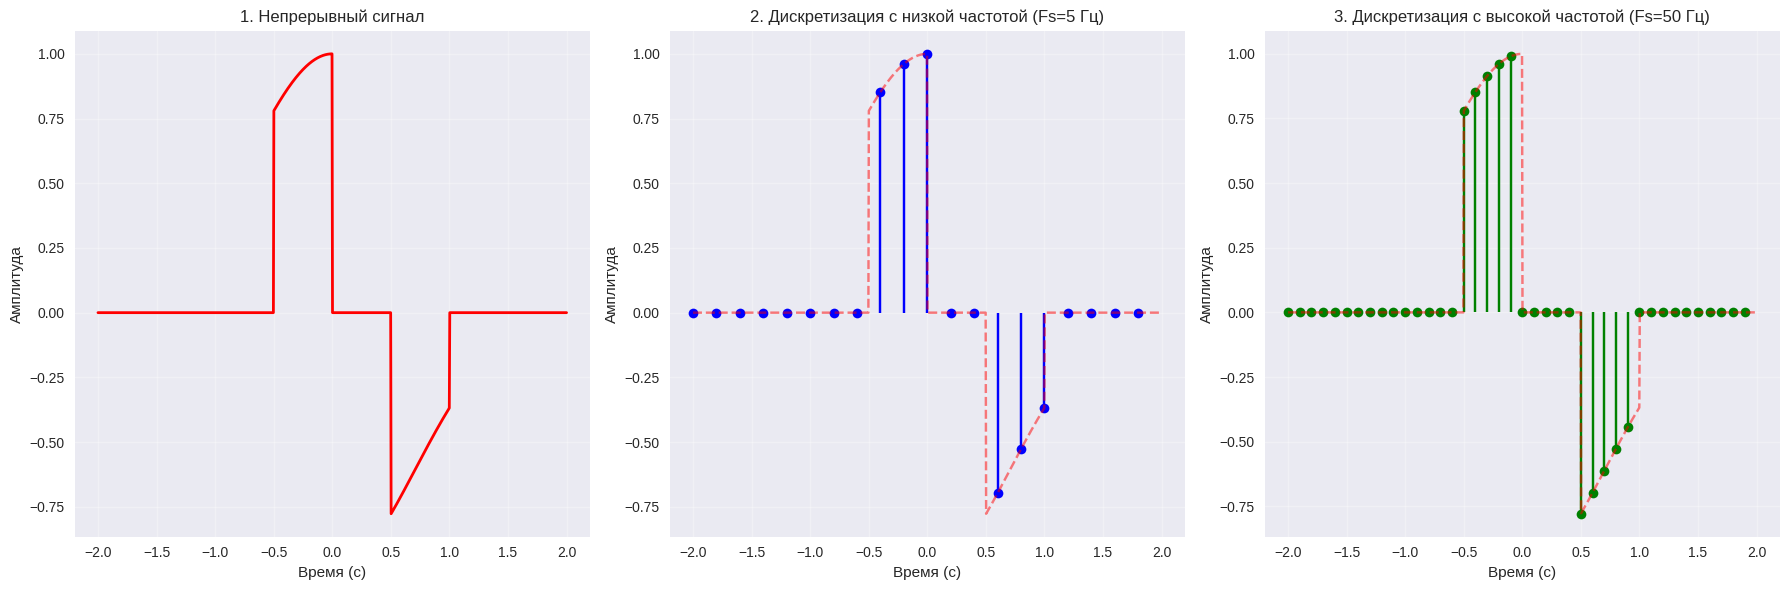


КЛЮЧЕВЫЕ РАЗЛИЧИЯ МЕЖДУ CTFT И DFT:
НЕПРЕРЫВНОЕ ПРЕОБРАЗОВАНИЕ ФУРЬЕ (CTFT):
• Интеграл: G(f) = ∫ g(t)·exp(-j2πft) dt
• Работает с непрерывными сигналами
• Дает непрерывный спектр частот
• Требует аналитического или численного интегрирования

ДИСКРЕТНОЕ ПРЕОБРАЗОВАНИЕ ФУРЬЕ (DFT):
• Сумма: G[k] = Σ g[n]·exp(-j2πkn/N)
• Работает с дискретными отсчетами сигнала
• Дает дискретный спектр частот
• Может быть вычислено быстро (FFT)

СВЯЗЬ МЕЖДУ НИМИ:
• DFT может приближать CTFT: G(f=k·Fs/N) ≈ (1/Fs)·exp(j2πft₀)·G[k]
• Точность зависит от частоты дискретизации Fs
• Требуется соблюдение теоремы Котельникова (Fs ≥ 2·B)
• Из-за принципа неопределенности, нельзя быть точно ограниченным и во времени, и по частоте

4. ЭФФЕКТ ГИББСА И ОГРАНИЧЕННОСТЬ ПРИБЛИЖЕНИЯ:


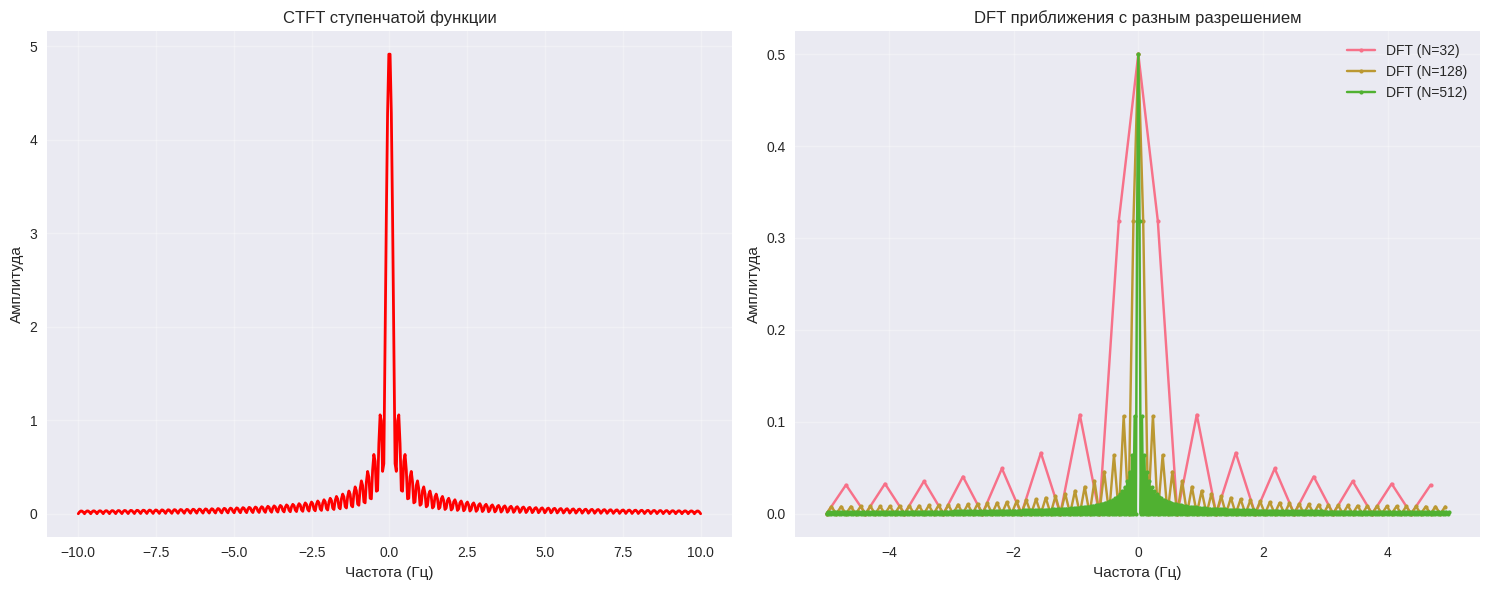

Эффект Гибса: при приближении разрывных функций DFT демонстрирует осцилляции
Эти осцилляции уменьшаются с увеличением числа точек, но никогда полностью не исчезают


In [17]:

# Иллюстрация процесса дискретизации
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Исходный непрерывный сигнал
t_continuous = np.linspace(-2, 2, 1000)
signal_continuous = gaussian_rect_sum(t_continuous)

axes[0].plot(t_continuous, signal_continuous, 'r-', linewidth=2)
axes[0].set_xlabel('Время (с)')
axes[0].set_ylabel('Амплитуда')
axes[0].set_title('1. Непрерывный сигнал')
axes[0].grid(True, alpha=0.3)

# Сигнал с низкой дискретизацией
t_low = np.arange(-2, 2, 1./5)  # Fs = 5 Гц
samples_low = gaussian_rect_sum(t_low)
axes[1].stem(t_low, samples_low, linefmt='b-', markerfmt='bo', basefmt=' ')
axes[1].plot(t_continuous, signal_continuous, 'r--', alpha=0.5)
axes[1].set_xlabel('Время (с)')
axes[1].set_ylabel('Амплитуда')
axes[1].set_title('2. Дискретизация с низкой частотой (Fs=5 Гц)')
axes[1].grid(True, alpha=0.3)

# Сигнал с высокой дискретизацией
t_high = np.arange(-2, 2, 1./50)  # Fs = 50 Гц
samples_high = gaussian_rect_sum(t_high)
axes[2].stem(t_high[::5], samples_high[::5], linefmt='g-', markerfmt='go', basefmt=' ')
axes[2].plot(t_continuous, signal_continuous, 'r--', alpha=0.5)
axes[2].set_xlabel('Время (с)')
axes[2].set_ylabel('Амплитуда')
axes[2].set_title('3. Дискретизация с высокой частотой (Fs=50 Гц)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nКЛЮЧЕВЫЕ РАЗЛИЧИЯ МЕЖДУ CTFT И DFT:")
print("=" * 60)
print("НЕПРЕРЫВНОЕ ПРЕОБРАЗОВАНИЕ ФУРЬЕ (CTFT):")
print("• Интеграл: G(f) = ∫ g(t)·exp(-j2πft) dt")
print("• Работает с непрерывными сигналами")
print("• Дает непрерывный спектр частот")
print("• Требует аналитического или численного интегрирования")
print()
print("ДИСКРЕТНОЕ ПРЕОБРАЗОВАНИЕ ФУРЬЕ (DFT):")
print("• Сумма: G[k] = Σ g[n]·exp(-j2πkn/N)")
print("• Работает с дискретными отсчетами сигнала")
print("• Дает дискретный спектр частот")
print("• Может быть вычислено быстро (FFT)")
print()
print("СВЯЗЬ МЕЖДУ НИМИ:")
print("• DFT может приближать CTFT: G(f=k·Fs/N) ≈ (1/Fs)·exp(j2πft₀)·G[k]")
print("• Точность зависит от частоты дискретизации Fs")
print("• Требуется соблюдение теоремы Котельникова (Fs ≥ 2·B)")
print("• Из-за принципа неопределенности, нельзя быть точно ограниченным и во времени, и по частоте")

# Демонстрация эффекта Гиббса
print("\n4. ЭФФЕКТ ГИББСА И ОГРАНИЧЕННОСТЬ ПРИБЛИЖЕНИЯ:")
print("=" * 60)

# Создаем сигнал с резкими переходами
def step_function(t):
    return (t > 0).astype(float)

t_step = np.linspace(-2, 2, 1000)
f_step = np.linspace(-10, 10, 500)
step_ctft = cft(step_function, f_step)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# CTFT ступенчатой функции
axes[0].plot(f_step, np.abs(step_ctft), 'r-', linewidth=2)
axes[0].set_xlabel('Частота (Гц)')
axes[0].set_ylabel('Амплитуда')
axes[0].set_title('CTFT ступенчатой функции')
axes[0].grid(True, alpha=0.3)

# DFT с разным количеством точек
N_values = [32, 128, 512]
for N in N_values:
    t_dft = np.linspace(-2, 2, N)
    samples_dft = step_function(t_dft)
    f_dft_freq = np.linspace(-5, 5, N, endpoint=False)  # Примерная частота дискретизации
    dft_result = fftshift(fft(samples_dft)) / N  # Упрощенное приближение
    axes[1].plot(f_dft_freq, np.abs(dft_result), 'o-', markersize=3, label=f'DFT (N={N})')

axes[1].set_xlabel('Частота (Гц)')
axes[1].set_ylabel('Амплитуда')
axes[1].set_title('DFT приближения с разным разрешением')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Эффект Гибса: при приближении разрывных функций DFT демонстрирует осцилляции")
print("Эти осцилляции уменьшаются с увеличением числа точек, но никогда полностью не исчезают")